<a href="https://colab.research.google.com/github/AdeebBinHuda/Deep-Learning/blob/main/News_Headlines_Dataset_For_Sarcasm_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rmisra/news-headlines-dataset-for-sarcasm-detection")

print("Path to dataset files:", path)

100%|██████████| 3.30M/3.30M [00:00<00:00, 138MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection/versions/2


In [ ]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
#import necessary file
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [ ]:
import json
import os

# The 'path' variable holds the directory where the dataset was downloaded.
# Construct the full path to the JSON file.
file_path = os.path.join(path, "Sarcasm_Headlines_Dataset.json")

sentences = []
labels = []

with open(file_path, 'r') as f:
    for line in f:
        item = json.loads(line)
        sentences.append(item['headline'])
        labels.append(item['is_sarcastic'])

In [ ]:
print(f"Number of sentences: {len(sentences)}")
print(f"Number of labels: {len(labels)}")

Number of sentences: 26709
Number of labels: 26709


In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
# seperate for training and testing
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
import numpy as np

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 30
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final), verbose=2)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_3      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
625/625 - 4s - 6ms/step - accuracy: 0.5660 - loss: 0.6793 - val_accuracy: 0.6235 - val_loss: 0.6484
Epoch 2/30
625/625 - 2s - 4ms/step - accuracy: 0.7330 - loss: 0.5423 - val_accuracy: 0.8122 - val_loss: 0.4524
Epoch 3/30
625/625 - 3s - 4ms/step - accuracy: 0.8198 - loss: 0.4062 - val_accuracy: 0.8185 - val_loss: 0.4062
Epoch 4/30
625/625 - 4s - 6ms/step - accuracy: 0.8507 - loss: 0.3486 - val_accuracy: 0.8432 - val_loss: 0.3738
Epoch 5/30
625/625 - 2s - 4ms/step - accuracy: 0.8701 - loss: 0.3121 - val_accuracy: 0.8362 - val_loss: 0.3712
Epoch 6/30
625/625 - 2s - 4ms/step - accuracy: 0.8791 - loss: 0.2875 - val_accuracy: 0.8489 - val_loss: 0.3529
Epoch 7/30
625/625 - 2s - 4ms/step - accuracy: 0.8949 - loss: 0.2591 - val_accuracy: 0.8521 - val_loss: 0.3506
Epoch 8/30
625/625 - 3s - 4ms/step - accuracy: 0.9046 - loss: 0.2400 - val_accuracy: 0.8533 - val_loss: 0.3526
Epoch 9/30
625/625 - 5s - 8ms/step - accuracy: 0.9058 - loss: 0.2313 - val_accuracy: 0.8565 - val_loss: 0.3450
E

In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.build(input_shape=(None, max_length)) # Explicitly build the model to initialize weights
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

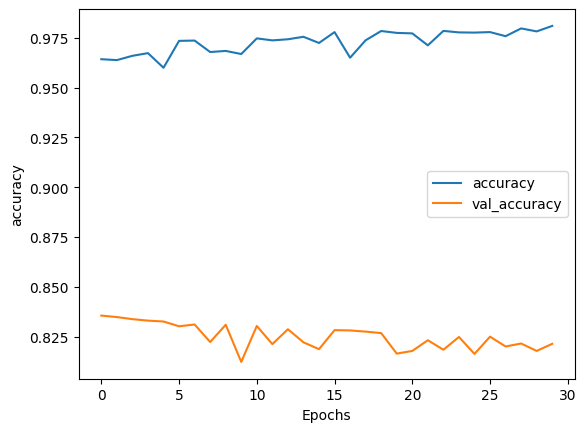

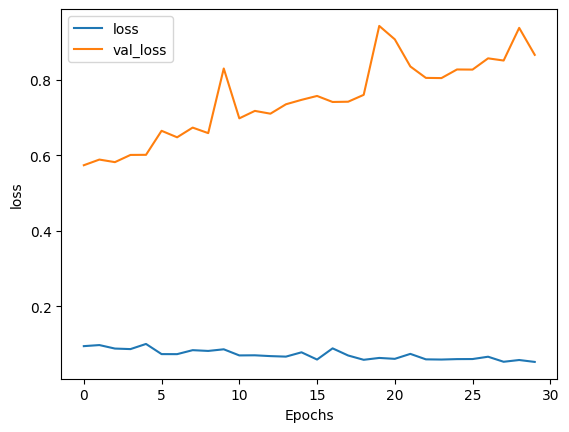

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[[0.50115734]
 [0.5011467 ]]
